In [42]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

In [43]:
# Constants
dir_path = '/Users/oliberman/Desktop/aloni/chest_xray'

train_set_path = 'train'
validation_set_path = 'val'
test_set_path = 'test'

labels = ['NORMAL', 'PNEUMONIA']

batch_size = 32 # The default batch size of keras. 
num_classes = 2 # Number of class for the dataset 
epochs = 100
data_augmentation = False

In [44]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(f'{dir_path}/{train_set_path}',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
test_set = test_datagen.flow_from_directory(f'{dir_path}/{test_set_path}',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



validation_generator = test_datagen.flow_from_directory(f'{dir_path}/{validation_set_path}',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [46]:
cnn_model = cnn.fit_generator(training_set,
                                 steps_per_epoch = 16,
                                 epochs = 50,
                                 validation_data = validation_generator,
                                 validation_steps = 624)

/var/folders/wv/t_37l67d3ll3xrvr1_32wx8h0000gn/T/ipykernel_37237/753274509.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(training_set,


Epoch 1/50
16/16 [==============================] - 9s 537ms/step - loss: 0.6156 - accuracy: 0.6992 - val_loss: 0.9170 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 7s 463ms/step - loss: 0.5261 - accuracy: 0.7500
Epoch 3/50
16/16 [==============================] - 8s 474ms/step - loss: 0.4345 - accuracy: 0.7949
Epoch 4/50
16/16 [==============================] - 8s 473ms/step - loss: 0.3477 - accuracy: 0.8359
Epoch 5/50
16/16 [==============================] - 8s 470ms/step - loss: 0.3076 - accuracy: 0.8691
Epoch 6/50
16/16 [==============================] - 8s 466ms/step - loss: 0.3021 - accuracy: 0.8555
Epoch 7/50
16/16 [==============================] - 8s 512ms/step - loss: 0.2703 - accuracy: 0.9004
Epoch 8/50
16/16 [==============================] - 9s 529ms/step - loss: 0.2572 - accuracy: 0.8906
Epoch 9/50
16/16 [==============================] - 8s 489ms/step - loss: 0.2551 - accuracy: 0.8984
Epoch 10/50
16/16 [==============================] - 7s 46

In [47]:
test_accu = cnn.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

/var/folders/wv/t_37l67d3ll3xrvr1_32wx8h0000gn/T/ipykernel_37237/3901488312.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=624)


The testing accuracy is : 80.7692289352417 %


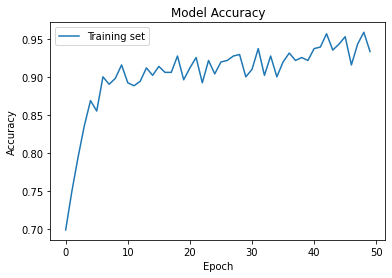

In [48]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
# plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

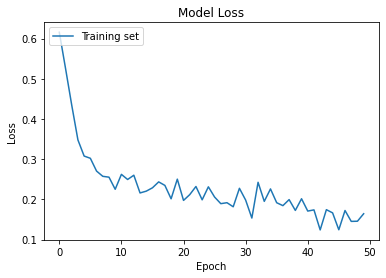

In [49]:
# Loss 
# plt.plot(cnn_model.history['validation_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [50]:
Y_pred = cnn.predict_generator(test_set, 64)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

/var/folders/wv/t_37l67d3ll3xrvr1_32wx8h0000gn/T/ipykernel_37237/1904999546.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(test_set, 64)


Confusion Matrix
[[234   0]
 [390   0]]


In [51]:
# Two more conv

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 32)        

In [52]:
cnn_model = cnn.fit_generator(training_set,
                                 steps_per_epoch = 16,
                                 epochs = 50,
                                 validation_data = validation_generator,
                                 validation_steps = 624)

/var/folders/wv/t_37l67d3ll3xrvr1_32wx8h0000gn/T/ipykernel_37237/753274509.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(training_set,


Epoch 1/50
16/16 [==============================] - 9s 542ms/step - loss: 0.6005 - accuracy: 0.7266 - val_loss: 0.7915 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 7s 440ms/step - loss: 0.5720 - accuracy: 0.7422
Epoch 3/50
16/16 [==============================] - 8s 496ms/step - loss: 0.5744 - accuracy: 0.7070
Epoch 4/50
16/16 [==============================] - 8s 474ms/step - loss: 0.4666 - accuracy: 0.7637
Epoch 5/50
16/16 [==============================] - 8s 507ms/step - loss: 0.4097 - accuracy: 0.7910
Epoch 6/50
16/16 [==============================] - 8s 499ms/step - loss: 0.4364 - accuracy: 0.7930
Epoch 7/50
16/16 [==============================] - 8s 497ms/step - loss: 0.3223 - accuracy: 0.8652
Epoch 8/50
16/16 [==============================] - 8s 523ms/step - loss: 0.4431 - accuracy: 0.7910
Epoch 9/50
16/16 [==============================] - 8s 477ms/step - loss: 0.3453 - accuracy: 0.8652
Epoch 10/50
16/16 [==============================] - 8s 49

In [53]:
test_accu = cnn.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

/var/folders/wv/t_37l67d3ll3xrvr1_32wx8h0000gn/T/ipykernel_37237/3901488312.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=624)


The testing accuracy is : 89.42307829856873 %


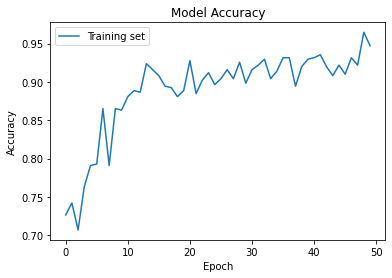

In [54]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
# plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

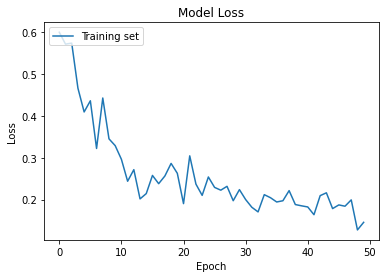

In [55]:
# Loss 
# plt.plot(cnn_model.history['validation_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()